# Data Mining 2020 - HW

### ※git clone https://github.com/zihengh1/DM2020.git
### ※Kaggle is a data science platform for model learning and data analysis.
### ※Data Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
####  ﹡A classification problem to predict who will stay in the company.
####  ﹡Attributes: 27, Data: 1470

##### Prepared by 108971020 張三妹

In [1]:
## Import Library ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For Data Encoding ##
from sklearn.preprocessing import LabelEncoder

## For Model Evaluation ##
from sklearn.model_selection import KFold

## Machine Learning Model ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

## For Model Performance ##
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## For Feature Selection ##
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## For Imbalance Data
from sklearn.utils import resample

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
#!pip install imbalanced-learn
## SMOTE For Imbalance Data
import imblearn
print(imblearn.__version__)

0.7.0


In [3]:
## Model Performance
def evaluation(gt, pred):
    acc = accuracy_score(gt, pred)
    precision = precision_score(gt, pred)
    recall = recall_score(gt, pred)
    f1 = f1_score(gt, pred)
    matrix = confusion_matrix(gt, pred)
    
    return acc, precision, recall, f1, matrix

In [4]:
raw_data = pd.read_csv("./EmployeeAttrition.csv", index_col=0)

In [5]:
raw_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [6]:
categorical_col = []
numeric_col = []
plt_numeric_col = []
for col in raw_data.columns:
    if raw_data[col].dtype == object and col != "Attrition":
        categorical_col.append(col)
        print(col, raw_data[col].unique())
        print("========================================================================")
    elif raw_data[col].dtype != object and col != "Attrition":
         numeric_col.append(col)           

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']


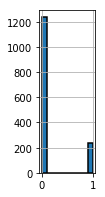

0    1233
1     237
Name: Attrition, dtype: int64

In [7]:
## Encode Label
raw_data["Attrition"] = raw_data["Attrition"].astype("category").cat.codes
raw_data["Attrition"].hist(edgecolor='black', linewidth=1.5, figsize=(1, 3))
plt.show()
raw_data["Attrition"].value_counts()

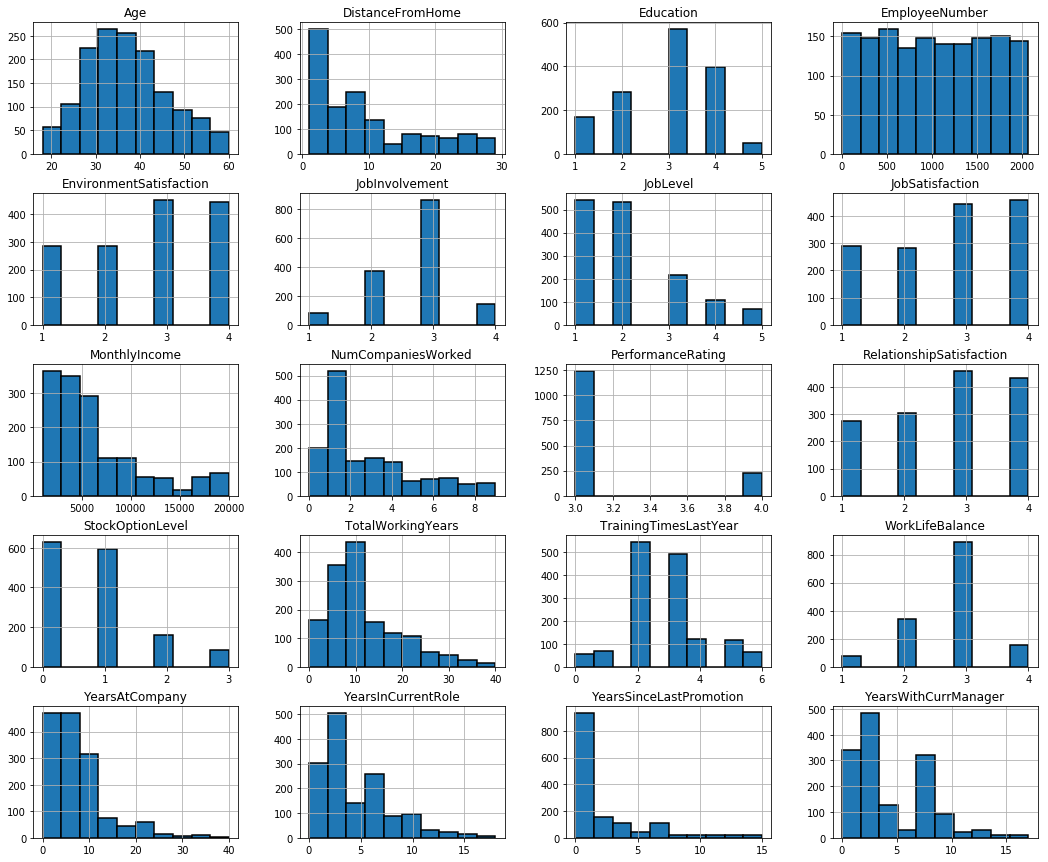

In [8]:
## Data Visualization for numerical data
raw_data[numeric_col].hist(edgecolor='black', linewidth=1.5, figsize=(18, 15))
plt.show()

In [9]:
## Data Analysis - DistanceFromHome
##X = np.array(raw_data["DistanceFromHome"]).reshape(len(raw_data), 1)
##y = np.array(raw_data["Attrition"])
##model = LinearRegression()
##model = model.fit(X, y)
##pred = model.predict(X)

##plt.figure(figsize=(10, 8))
##plt.scatter(raw_data["DistanceFromHome"], raw_data["Attrition"])
##plt.plot(raw_data["DistanceFromHome"], pred, color="red", linewidth = 3)
##plt.xlabel("DistanceFromHome")
##plt.ylabel("Attrition")
##plt.show()

EnvironmentSatisfaction [1, 2, 3, 4]
StockOptionLevel [0, 1, 2, 3]
TrainingTimesLastYear [0, 1, 2, 3, 4, 5, 6]
WorkLifeBalance [1, 2, 3, 4]


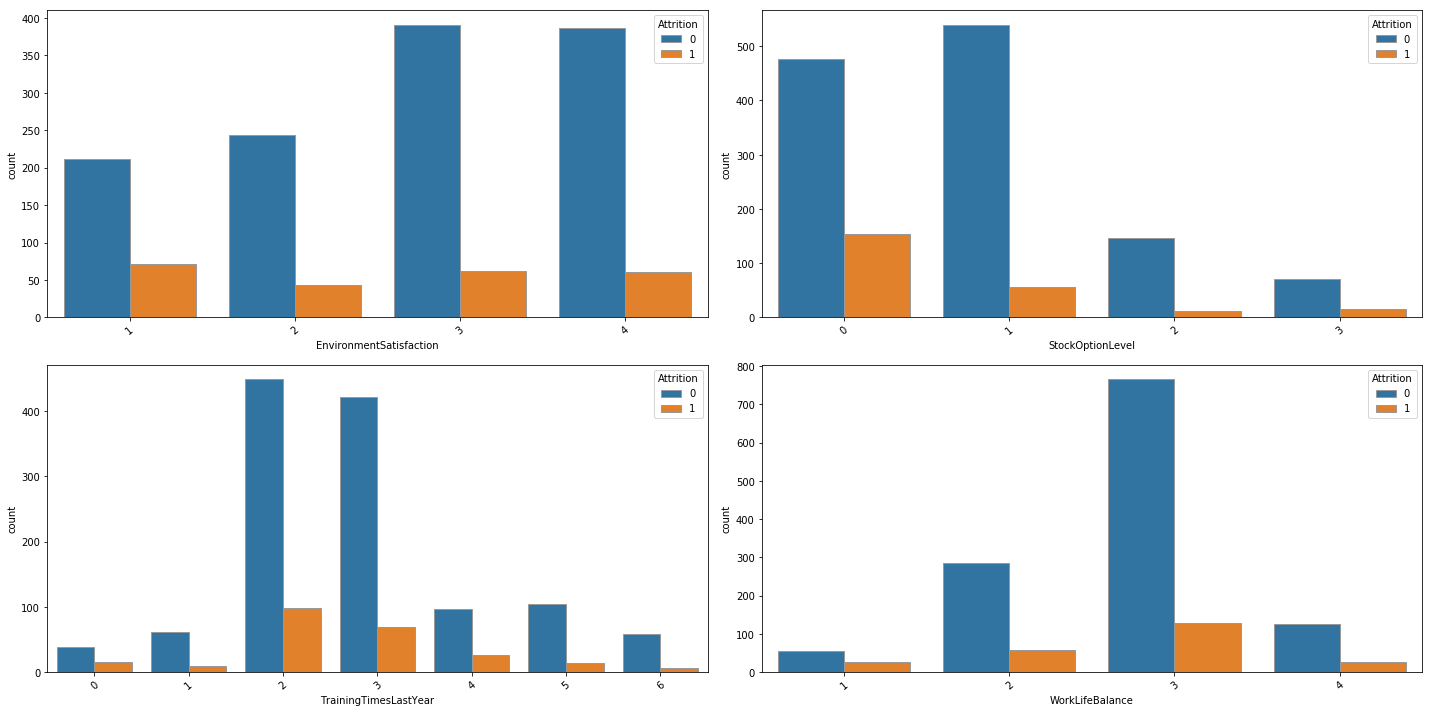

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [10]:
## Data Visualization for DistanceFromHome, NumCompaniesWorked
plt_col = []
for col in raw_data.columns:
    if col == "EnvironmentSatisfaction":
        plt_col.append(col)
        print(col, sorted(raw_data[col].unique()))
        print("============================================================================================================")
#    elif col == "NumCompaniesWorked":
#         plt_col.append(col)           
#         print(col, sorted(raw_data[col].unique()))
#         print("============================================================================================================")            
    elif col == "TrainingTimesLastYear":
         plt_col.append(col)           
         print(col, sorted(raw_data[col].unique()))
         print("============================================================================================================") 
    elif col == "WorkLifeBalance":
         plt_col.append(col)           
         print(col, sorted(raw_data[col].unique()))
         print("============================================================================================================") 
    elif col == "StockOptionLevel":
         plt_col.append(col)           
         print(col, sorted(raw_data[col].unique()))
         print("============================================================================================================") 
#    elif col == "DistanceFromHome":
#         plt_col.append(col)           
#         print(col, sorted(raw_data[col].unique()))
#         print("============================================================================================================") 
#    elif col == "Education":
#         plt_col.append(col)           
#         print(col, sorted(raw_data[col].unique()))
#         print("============================================================================================================") 
         
            
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for index, col in enumerate(plt_col):
    row_num = int(index / 2)
    col_num = (index % 2)
    label = sorted(list(raw_data[col].unique()))
    sns.countplot(x=str(col), hue="Attrition", edgecolor=".6", data=raw_data, ax = axes[row_num, col_num])
    axes[row_num, col_num].set_xticklabels(label, rotation=40)
plt.tight_layout()
plt.show()


raw_data["EnvironmentSatisfaction"].value_counts()

In [11]:
##TotalWorkingYears V.S. MonthlyIncome 
X = np.array(raw_data["TotalWorkingYears"]).reshape(len(raw_data), 1)
y = np.array(raw_data["MonthlyIncome"])
model = LinearRegression()
model = model.fit(X, y)
pred = model.predict(X)
print("y = %f * X + %f" % (model.coef_[0], model.intercept_))

y = 467.658412 * X + 1227.935288


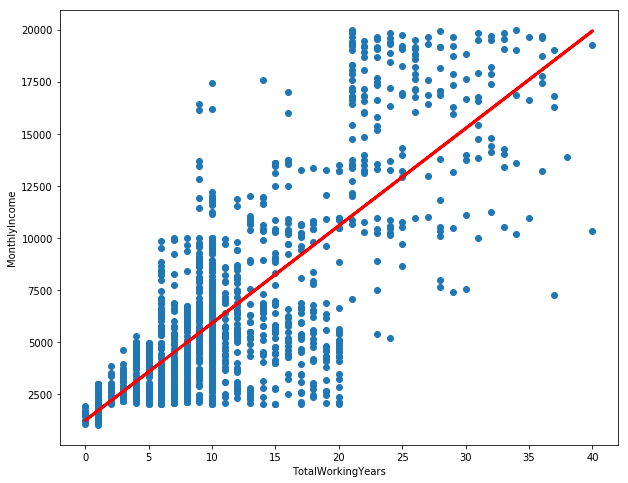

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(raw_data["TotalWorkingYears"], raw_data["MonthlyIncome"])
plt.plot(raw_data["TotalWorkingYears"], pred, color="red", linewidth = 3)
plt.xlabel("TotalWorkingYears")
plt.ylabel("MonthlyIncome")
plt.show()

In [13]:
##Eductation V.S. MonthlyIncome 
X = np.array(raw_data["Education"]).reshape(len(raw_data), 1)
y = np.array(raw_data["MonthlyIncome"])
model = LinearRegression()
model = model.fit(X, y)
pred = model.predict(X)
print("y = %f * X + %f" % (model.coef_[0], model.intercept_))

y = 436.522228 * X + 5231.374707


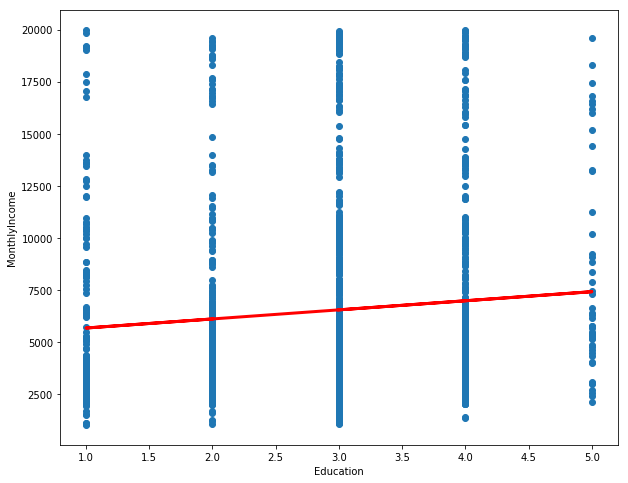

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(raw_data["Education"], raw_data["MonthlyIncome"])
plt.plot(raw_data["Education"], pred, color="red", linewidth = 3)
plt.xlabel("Education")
plt.ylabel("MonthlyIncome")
plt.show()

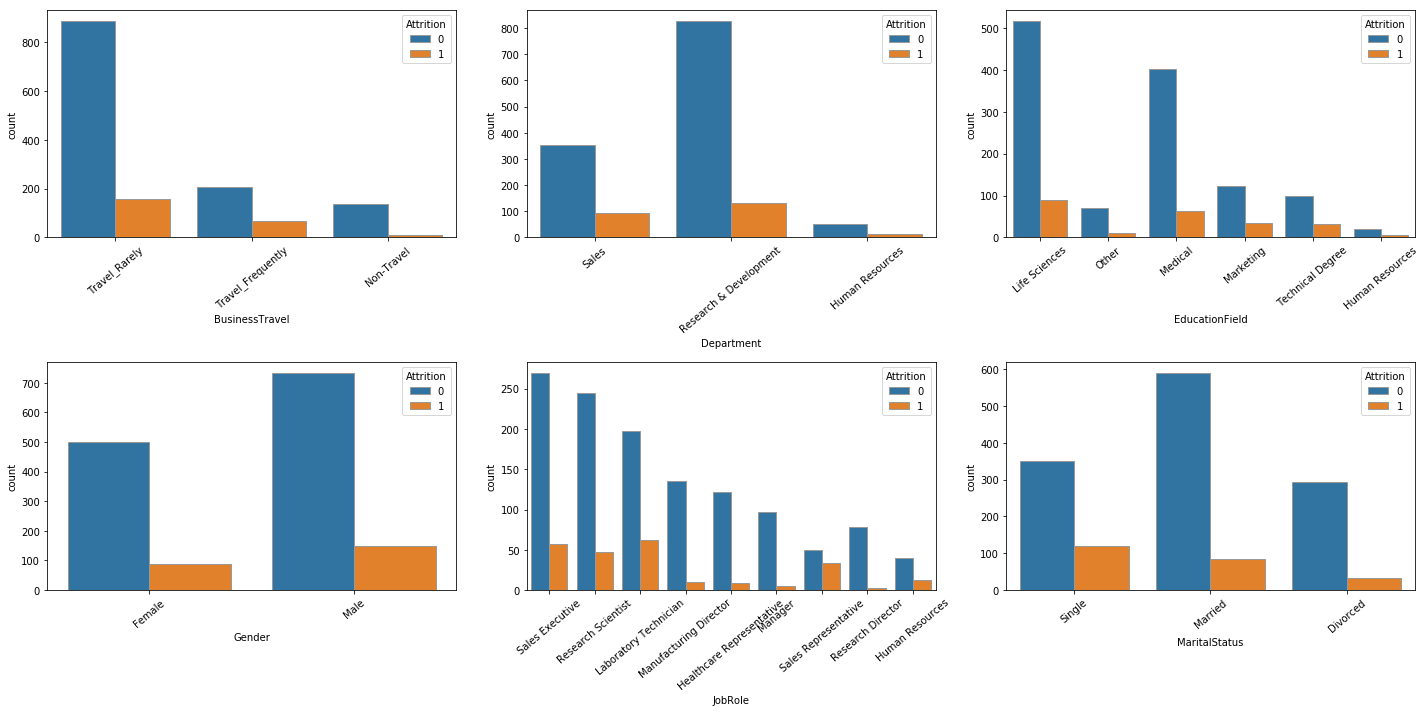

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [15]:
## Data Visualization for categorical data
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(categorical_col):
    row_num = int(index / 3)
    col_num = (index % 3)
    label = list(raw_data[col].unique())
    sns.countplot(x=str(col), hue="Attrition", edgecolor=".6", data=raw_data, ax = axes[row_num, col_num])
    axes[row_num, col_num].set_xticklabels(label, rotation=40)
plt.tight_layout()
plt.show()

raw_data["BusinessTravel"].value_counts()

In [16]:
## Data Encoding (one-hot encoding)
one_hot_encoding_df = pd.get_dummies(raw_data, columns=categorical_col)

In [17]:
## SMOTE
oversample = SMOTE()
X = one_hot_encoding_df.iloc[:,one_hot_encoding_df.columns != 'Attrition']
y = one_hot_encoding_df['Attrition']
X, y = oversample.fit_resample(X, y)

In [18]:
one_hot_encoding_df[0:5]

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,1,2,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,0,8,1,2,3,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,2,4,4,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,5,4,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,7,1,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


In [19]:
counter = Counter(y)
print(counter)

Counter({1: 1233, 0: 1233})


In [20]:
## Model Learning (Random Forest) - SMOTE
totalIB=len(X)
print(totalIB)

testPortionIB = 0.3
testSizeIB = int(testPortionIB*totalIB)

IB_XX = X
IB_yy = y

trainIB_X = IB_XX[0:-testSizeIB]
trainIB_y = IB_yy[0:-testSizeIB]
testIB_X = IB_XX[-testSizeIB:]
testIB_y = IB_yy[-testSizeIB:]

model = RandomForestClassifier(n_estimators=300)
model = model.fit(trainIB_X, trainIB_y)
test_predictIB = model.predict(testIB_X)
    
   
acc, precision, recall, f1, matrix = evaluation(testIB_y, test_predictIB)
print("Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))

2466
Accuracy: 0.940000, Precision: 1.000000, Recall: 0.940000, F1: 0.969000


In [21]:
### SMOTE - AUROC
prob_y_0 = model.predict_proba(IB_XX)
prob_y_0 = [p[1] for p in prob_y_0]

print( roc_auc_score(IB_yy, prob_y_0) )

0.9998644994471446


In [22]:
### SMOTE - AUROC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, IB_XX, IB_yy, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores)
print('Mean ROC AUC: %.3f' % mean(scores))

[0.97349571 0.97697574 0.9806458  0.96966854 0.98342714 0.96854562
 0.9660314  0.98180606 0.981732   0.97637504 0.96843089 0.97878608
 0.98726178 0.98265363 0.96854119]
Mean ROC AUC: 0.976


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainIB_X, trainIB_y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

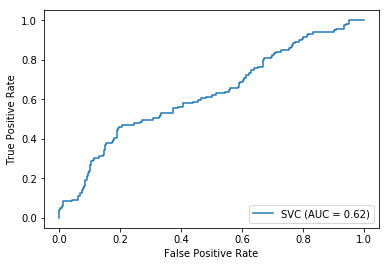

In [24]:
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

In [25]:
## Model Learning (Random Forest)
total=len(one_hot_encoding_df)
print(total)

testPortion = 0.3
testSize = int(testPortion*total)

lr_XX = one_hot_encoding_df.loc[:,one_hot_encoding_df.columns != 'Attrition']
lr_yy = one_hot_encoding_df["Attrition"]

train_X = lr_XX[0:-testSize]
train_y = lr_yy[0:-testSize]
test_X = lr_XX[-testSize:]
test_y = lr_yy[-testSize:]

model = RandomForestClassifier(n_estimators=300)
model = model.fit(train_X, train_y)
test_predict = model.predict(test_X)
    
   
acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
print("Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))

1470
Accuracy: 0.873000, Precision: 0.846000, Recall: 0.169000, F1: 0.282000


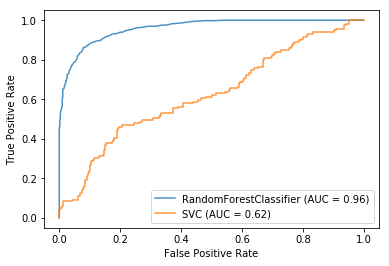

In [26]:
ax = plt.gca()
#rfc_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(model, trainIB_X, trainIB_y, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [27]:
## Feature Selection
oh_X = one_hot_encoding_df.iloc[:,2:46]
oh_y = one_hot_encoding_df['Attrition']

Selector = SelectKBest(chi2, k=43)
X_new = Selector.fit_transform(oh_X,oh_y)
train_X_new = Selector.get_support()
train_X_new[0:43]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True])

In [28]:
one_hot_encoding_df.iloc[:,2:46]

,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married
0,1,2,1,2,3,2,4,5993,8,3,...,0,0,0,0,0,0,1,0,0,0
1,8,1,2,3,2,2,2,5130,1,4,...,0,0,0,0,0,1,0,0,0,1
2,2,2,4,4,2,1,3,2090,6,3,...,0,1,0,0,0,0,0,0,0,0
3,3,4,5,4,3,1,3,2909,1,3,...,0,0,0,0,0,1,0,0,0,1
4,2,1,7,1,3,1,2,3468,9,3,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,23,2,2061,3,4,2,4,2571,4,3,...,0,1,0,0,0,0,0,0,0,1
1466,6,1,2062,4,2,3,1,9991,4,3,...,0,0,0,0,0,0,0,0,0,1
1467,4,3,2064,2,4,2,2,6142,1,4,...,0,0,0,1,0,0,0,0,0,1
1468,2,3,2065,4,2,2,2,5390,2,3,...,0,0,0,0,0,0,1,0,0,1


In [29]:
## Feature Selection - Drop
one_hot_encoding_df = one_hot_encoding_df.drop(['JobRole_Sales Representative'], axis=1)
one_hot_encoding_df[0:5]

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,1,2,3,2,4,5993,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,2,3,2,2,2,5130,...,0,0,0,0,0,1,0,0,1,0
2,37,1,2,2,4,4,2,1,3,2090,...,0,1,0,0,0,0,0,0,0,1
3,33,0,3,4,5,4,3,1,3,2909,...,0,0,0,0,0,1,0,0,1,0
4,27,0,2,1,7,1,3,1,2,3468,...,0,1,0,0,0,0,0,0,1,0


In [30]:
## Data Splitting and Model Learning (Random Forest)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    model = RandomForestClassifier(n_estimators=300)
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    avg_feature_importance.append(model.feature_importances_)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.850000, Precision: 0.714000, Recall: 0.106000, F1: 0.185000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.867000, Precision: 0.700000, Recall: 0.163000, F1: 0.264000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.810000, Precision: 0.714000, Recall: 0.085000, F1: 0.152000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.864000, Precision: 0.857000, Recall: 0.133000, F1: 0.231000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.871000, Precision: 0.857000, Recall: 0.140000, F1: 0.240000
Avg Accuracy: 0.852000, Avg Precision: 0.769000, Avg Recall: 0.125000, Avg F1: 0.214000


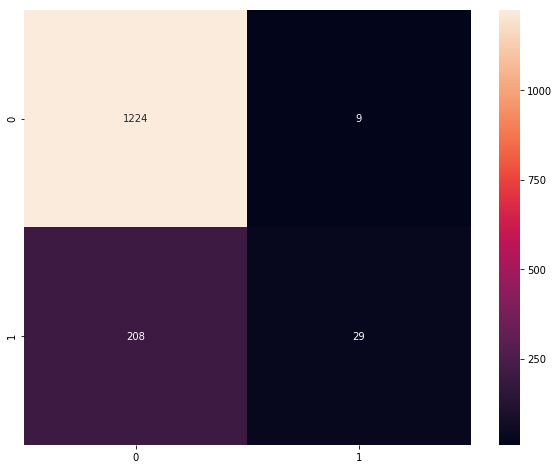

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [32]:
importance_dict = {}
for col, importance in zip(train_X.columns, np.mean(np.array(avg_feature_importance), axis=0)):
    importance_dict[col] = importance

sorted(importance_dict.items(), key=lambda x: -x[1])[:10]

[('MonthlyIncome', 0.08225710486398338),
 ('Age', 0.0705325339882957),
 ('EmployeeNumber', 0.06427641330218833),
 ('TotalWorkingYears', 0.059316831118211746),
 ('DistanceFromHome', 0.05623408465479655),
 ('YearsAtCompany', 0.04734905221952325),
 ('NumCompaniesWorked', 0.040411644347767395),
 ('YearsWithCurrManager', 0.03737963360417029),
 ('EnvironmentSatisfaction', 0.034480221457275265),
 ('YearsInCurrentRole', 0.03282982462255837)]

In [33]:
## Data Splitting and Model Learning (Logistic Regression)
avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    model = LogisticRegression(solver='liblinear')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.857000, Precision: 0.667000, Recall: 0.213000, F1: 0.323000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.864000, Precision: 0.615000, Recall: 0.186000, F1: 0.286000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.813000, Precision: 0.625000, Recall: 0.169000, F1: 0.267000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.867000, Precision: 0.750000, Recall: 0.200000, F1: 0.316000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.874000, Precision: 0.714000, Recall: 0.233000, F1: 0.351000
Avg Accuracy: 0.855000, Avg Precision: 0.674000, Avg Recall: 0.200000, Avg F1: 0.308000


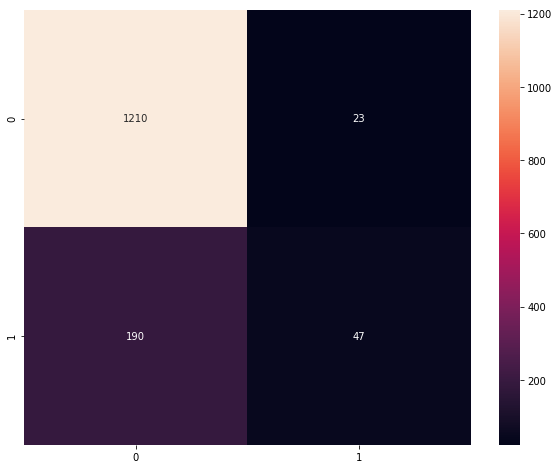

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [35]:
confusion_matrix = confusion_matrix(test_y, test_predict)
print(confusion_matrix)

[[247   4]
 [ 33  10]]


In [47]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy')
tree_model = tree_model.fit(train_X, train_y)

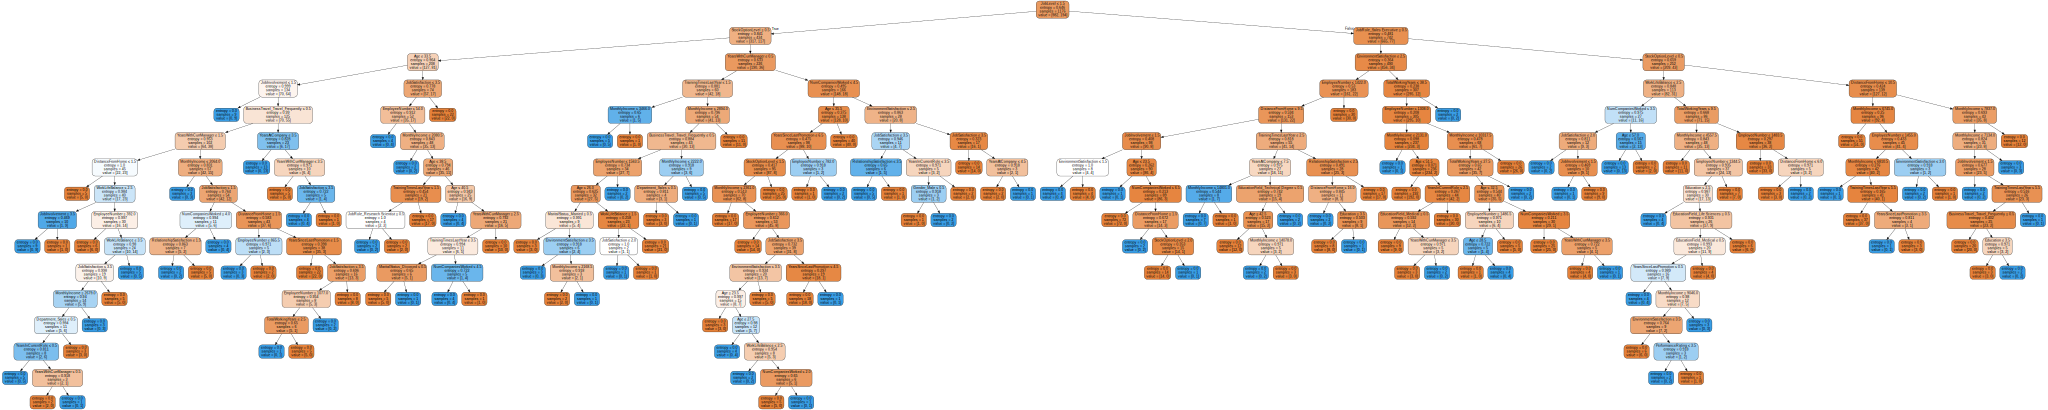

In [48]:
import graphviz 
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                     feature_names=train_X.columns,  
                    # class_names=train_y.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("tree_model") 
graph 